### PART 2 - ANALYSIS AND MACHINE LEARNING.

As explained in the readme file, the aim of the project is to predict the rating that would be given to a book based on a certain amount of input data. This notebook is the second part of the project and it concerns the Machine learning part.


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Download the initial dataset of Books list
git_path = 'https://github.com/gunony/ML_Book_Valuations/raw/main/datasets/'
url = git_path+'Books_Final.csv'
df_Books = pd.read_csv(url,sep=",")

In [5]:
df_Books.info()
# 27 variables and 14485 observations. The response variable is 'average_rating' (=Y).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   bookID                                         14485 non-null  int64  
 1   title                                          14485 non-null  object 
 2   authors                                        14485 non-null  object 
 3   average_rating                                 14485 non-null  float64
 4   isbn                                           14485 non-null  object 
 5   isbn13                                         14485 non-null  object 
 6   language_code                                  14485 non-null  object 
 7   num_pages                                      14485 non-null  int64  
 8   ratings_count                                  14485 non-null  int64  
 9   text_reviews_count                             144

We can remove the following useless columns : bookID + title + authors + isbn + isbn13 + co-authors + publisher + main_genre + book_format.
And we can simplify the average-rating, which is the rating of the books, by just reducing the value as an intenger. For that we decide to keep the first figure. For example 3.61 is reduced to 3.



In [32]:
df_Books=df_Books.drop(columns=['bookID','title','authors','isbn','isbn13','co-authors','publisher','main_genre','book_format'])
df_Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   average_rating                                 14485 non-null  float64
 1   language_code                                  14485 non-null  object 
 2   num_pages                                      14485 non-null  int64  
 3   ratings_count                                  14485 non-null  int64  
 4   text_reviews_count                             14485 non-null  int64  
 5   publication_date                               14485 non-null  object 
 6   genres.history, historical fiction, biography  12664 non-null  float64
 7   genres.fiction                                 12664 non-null  float64
 8   genres.fantasy, paranormal                     12664 non-null  float64
 9   genres.mystery, thriller, crime                126

In [31]:
df_Books['language_code'].value_counts()

eng    13465
spa      288
fre      255
ger      186
ita       82
jpn       64
por       25
mul       19
zho       15
nl        13
grc       11
swe        9
dan        7
pol        7
tur        5
gre        3
rus        3
lat        3
ind        2
srp        2
hin        2
ara        2
cat        2
cze        1
est        1
rum        1
urd        1
tam        1
nor        1
fin        1
kor        1
mar        1
ale        1
gla        1
wel        1
glg        1
msa        1
nob        1
Name: language_code, dtype: int64

We must keep the language code variable, but we have to simplify it as there are a lot of different languages. We are going to create four categories of language : english, spanish, french, german and other. Then we will make one-encoding

In [34]:
valid_lang = ['eng', 'fre', 'spa', 'ger'] # the code to keep
df_Books['language_code'] = df_Books['language_code'].apply(lambda x: x if x in valid_lang else 'oth') # the modification of the df
df_Books['language_code'].value_counts() # checking the result

eng    13465
oth      291
spa      288
fre      255
ger      186
Name: language_code, dtype: int64

In [137]:
cat_encoder = OneHotEncoder(sparse_output=False) #initialize the OHE
language_encoded = cat_encoder.fit_transform(df_Books[['language_code']]) #transform the language variable into matrix
cat_encoder.feature_names_in_ # header columns
cat_encoder.get_feature_names_out()
df_language =pd.DataFrame(language_encoded,
                          columns=cat_encoder.get_feature_names_out(),
                          index = df_Books[['language_code']].index) # create df for languages
df_Books = pd.concat([df_Books,df_language], axis = 1) # Update df with langugae df

In [138]:
df_Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   average_rating                                 14485 non-null  float64
 1   language_code                                  14485 non-null  object 
 2   num_pages                                      14485 non-null  int64  
 3   ratings_count                                  14485 non-null  int64  
 4   text_reviews_count                             14485 non-null  int64  
 5   publication_date                               14485 non-null  object 
 6   genres.history, historical fiction, biography  12664 non-null  float64
 7   genres.fiction                                 12664 non-null  float64
 8   genres.fantasy, paranormal                     12664 non-null  float64
 9   genres.mystery, thriller, crime                126

Check if the language code process is correct.

In [188]:
error_eng = error_fre = error_ger = error_spa= error_oth = comptage = 0 #initialisation

for index, row in df_Books.iterrows():
    comptage +=1 #counting number of rows
    if row['language_code'] == 'eng' and row['language_code_eng'] != 1 :
        error_eng +=1 
    elif row['language_code'] == 'fre' and row['language_code_fre'] != 1 :
        error_fre +=1
    elif row['language_code'] == 'ger' and row['language_code_ger'] != 1 : 
        error_ger = +1
    elif row['language_code'] == 'spa' and row['language_code_spa'] != 1 : 
        error_spa = +1
    elif row['language_code'] == 'oth' and row['language_code_oth'] != 1 : 
        error_spa = +1
print(error_eng, error_fre, error_ger, error_spa, error_spa, "MUST BE ALL ZERO")
print("COMPTAGE = ",comptage)

0 0 0 0 0 MUST BE ALL ZERO
COMPTAGE =  14485


In [153]:
df_Books[df_Books['language_code'].isin(["eng"])].sum()

average_rating                                                                              996.64
language_code                                    frefrefrefrefrefrefrefrefrefrefrefrefrefrefref...
num_pages                                                                                    86964
ratings_count                                                                               476678
text_reviews_count                                                                            9969
publication_date                                 1994-04-012002-11-072001-03-312005-05-032005-1...
genres.history, historical fiction, biography                                              33656.0
genres.fiction                                                                            141909.0
genres.fantasy, paranormal                                                                 57446.0
genres.mystery, thriller, crime                                                            27559.0
genres.poe

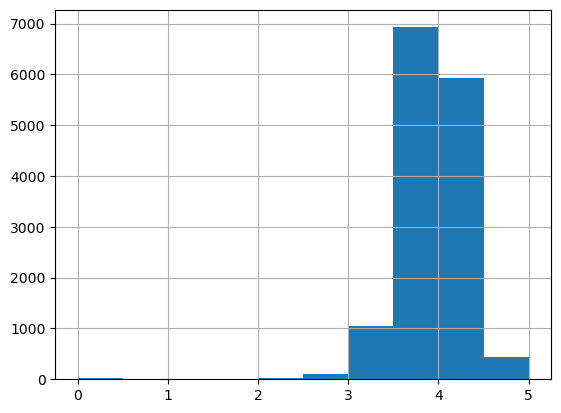

In [29]:
# Plotting a histogram
df_Books['average_rating'].hist()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x204e8aed7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x204e9327610>,
 'boxes': [<matplotlib.lines.Line2D at 0x204e9325910>],
 'medians': [<matplotlib.lines.Line2D at 0x204e933ca10>],
 'fliers': [<matplotlib.lines.Line2D at 0x204e8aff890>],
 'means': []}

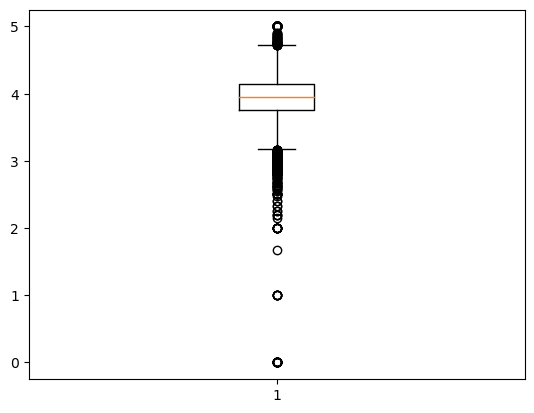

In [30]:
plt.boxplot(df_Books['average_rating'])